In [55]:
import tensorflow as tf # multidimensional arrays

# two-dimensional tensor
x = tf.constant([[1., 2., 3.],  # objects
                 [4., 5., 6.]])

print(x)
# attributes
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


In [56]:
## TensorFlow implements standard mathematical operations on tensors
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [57]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [58]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [59]:
## to see more -> https://www.tensorflow.org/guide/basics

In [60]:
# Training loops
## https://www.tensorflow.org/guide/basics#training_loops

In [61]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

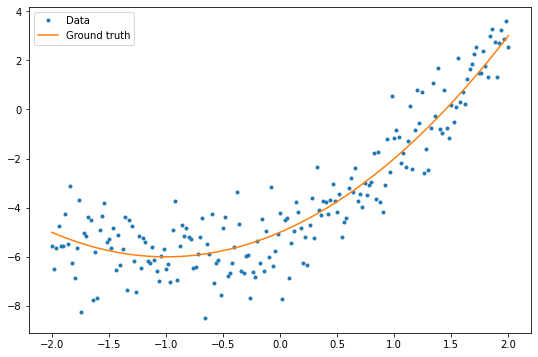

In [62]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y  

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend();

In [63]:
## Create a model:
class Model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = tf.keras.layers.Dense(units=units,
                                            activation=tf.nn.relu,
                                            kernel_initializer=tf.random.normal,
                                            bias_initializer=tf.random.normal
                                            )
        self.dense2 = tf.keras.layers.Dense(1)
        
    def call(self, x, training=True):
        # For Keras layers/models, implement `call` instead of `__call__`.
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis=1)

In [64]:
model = Model(64)

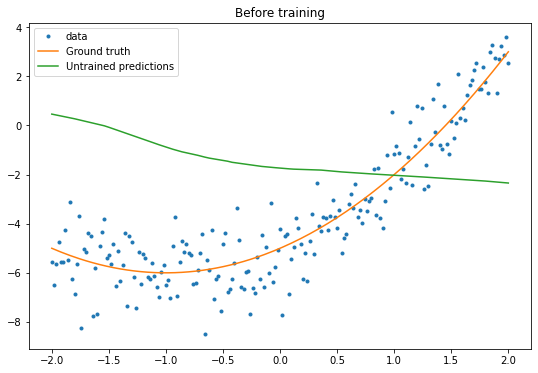

In [65]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [70]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
    with tf.GradientTape() as tape:
        prediction = model(x)
        error = (y-prediction)**2
        mean_error = tf.reduce_mean(error)
    gradient = tape.gradient(mean_error, variables)
    optimizer.apply_gradients(zip(gradient, variables))

    if step % 100 == 0:
        print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 1.032
Mean squared error: 1.031
Mean squared error: 1.030
Mean squared error: 1.029
Mean squared error: 1.028
Mean squared error: 1.027
Mean squared error: 1.027
Mean squared error: 1.026
Mean squared error: 1.025
Mean squared error: 1.024


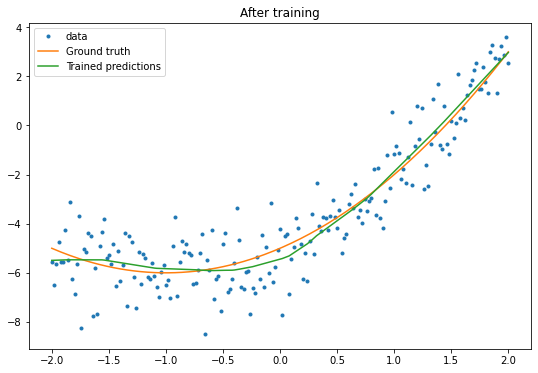

In [71]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();